# Scraping Tweets & Sentiment Analysis

Here I show how to scrape tweets from twitter using snscrape and perform sentiment analysis using vaderSentiment. We can also perform sentiment analysis of particular mentions by certain user account. I chose @elonmusk for this task.

# snScrape

In [ ]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# define a function to scrape tweets for any username
def scrape(username,max_tweets):
    tweets_list1 = []
    ll = ['from',username]
    l = ':'
    l = l.join(ll)
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(l).get_items()):
        if i>max_tweets-1:
            break
        tweets_list1.append([tweet.content])
    tweets_df1 = pd.DataFrame(tweets_list1, columns=['Text'])
    return(tweets_df1)

df1 = scrape('elonmusk',10**4)
df1

,Text
0,@karpathy True. I have a CO2 monitor on my des...
1,@SpaceX @Space_Station About twice as much use...
2,@tanayj Absolutely
3,@Erdayastronaut @LevEakins More accurate word ...
4,@Rainmaker1973 I use this example a lot
...,...
9995,@CormacSheehan1 Occupy Mars
9996,@tesla_truth 👍
9997,Cat is out of the bag 🧙‍♂️ \nhttps://t.co/epUK...
9998,@austinbarnard45 Exciting progress in Boca! Ho...


One can also use snscrape to scrape conditional tweets. Simply go to advanced search in twitter, copy the text from search box and paste into the code below. For example; here I scrape latest 100 tweets where @elonmusk has used the word 'sleep'.

```
def condn(condition,maxTweets):
    tweets_list1 = []
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(str(condition)).get_items()):
        if i>maxTweets-1:
            break
        tweets_list1.append([tweet.content])
    tweets_df1 = pd.DataFrame(tweets_list1, columns=['Text'])
    return(tweets_df1)

df = condn('sleep (from:elonmusk)',10**2)
print(df)
```



In [ ]:
df = df1['Text']  # makes df a series

all_sentences = [] # make a list whose each element is a single tweet
for word in df:
    all_sentences.append(word)
print(all_sentences)

# Sentiment Analysis using vaderSentiment.SentimentIntensityAnalyser

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 15.7 MB/s 


In [ ]:
# importing SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
pos, neg, neu, oberall, positive, negative, neutral = ([] for i in range(7))

for i in range(len(df)):  
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(df[i])
    pos.append(sentiment_dict['pos']*100)
    neg.append(sentiment_dict['neg']*100)
    neu.append(sentiment_dict['neu']*100)
    if sentiment_dict['compound'] >= 0.05 :
      positive.append(1)
 
    elif sentiment_dict['compound'] <= - 0.05 :
      negative.append(-1)
 
    else :
      neutral.append(0)

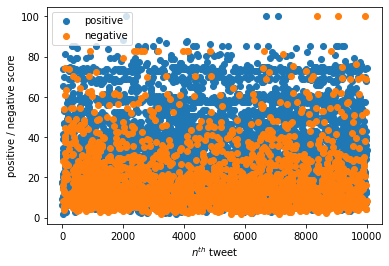

In [ ]:
# define a function to map all zero values to NaN
def zero_to_nan(sample): 
    return [np.nan if x==0 else x for x in sample]
pos,neg = zero_to_nan(pos),zero_to_nan(neg)

plt.scatter(np.arange(1,len(df)+1,1),pos,label='positive')
plt.scatter(np.arange(1,len(df)+1,1),neg,label='negative')
plt.xlabel('$n^{th}$ tweet')
plt.ylabel('positive / negative score')
plt.legend(loc='best')
plt.show()

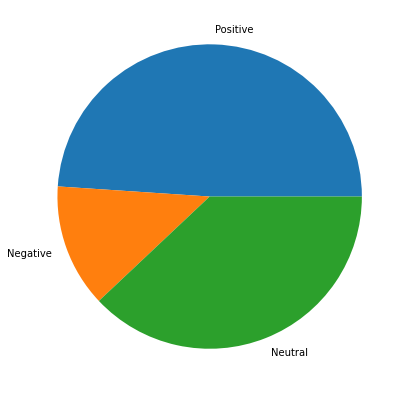

In [ ]:
sentiments = ['Positive', 'Negative', 'Neutral']
analysis = [len(positive),len(negative),len(neutral)]
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(analysis, labels = sentiments)
plt.show()

# Sentiment Analysis of tweets from @elonmusk mentioning particular user.

Process is simple and almost same as before, we just add a few steps. Firstly, we get a frequency count of every mention in the corpus. Secondly we filter the tweets mentioning the user of our choice and perform sentiment analysis.

In [ ]:
df = df1['Text']
all_sentences = []
for word in df:
    all_sentences.append(word)

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

import re
lines = [re.sub(r'[^@A-Za-z0-9]+', '', x) for x in lines]
print(lines)

In [ ]:
mentions = pd.DataFrame([x for x in lines if x.startswith('@')])
mentions[0].value_counts()

@Erdayastronaut    509
@Tesla             478
@PPathole          452
@SpaceX            429
@teslaownersSV     412
                  ... 
@juanjacobs          1
@JoshTownsend96      1
@IEEEorg             1
@bartsanders         1
@CormacSheehan1      1
Name: 0, Length: 3243, dtype: int64

In [ ]:
df2 = df1.iloc[df.str.contains(pat = '@Tesla')[df.str.contains(pat = '@Tesla')].index.values]
df2

,Text
14,@teslaownersSV @Tesla We’re making progress wi...
50,@Teslarati @ResidentSponge Join our undergroun...
55,@ajtourville @Tesla No problem to recycle the ...
83,@GailAlfarATX @Tesla @teslacn @TeslaOwnersEBay...
213,@TeslaAIBot @__SeriousGemini But we should hav...
...,...
9982,@Kristennetten @lexfridman @Tesla ~Q4 2016
9983,"@dodiewill2 @lexfridman @Tesla End of Q4, most..."
9984,@flcnhvy @lexfridman @Tesla Production fully s...
9985,@lexfridman @Tesla This is why it’s possible f...


In [ ]:
df2 = df2['Text']  #to make df a series

df = []
for word in df2:
    df.append(word)
print(df)

In [ ]:
pos, neg, neu, oberall, positive, negative, neutral = ([] for i in range(7))
for i in range(len(df)):  
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(df[i])
    pos.append(sentiment_dict['pos']*100)
    neg.append(sentiment_dict['neg']*100)
    neu.append(sentiment_dict['neu']*100)
    if sentiment_dict['compound'] >= 0.05 :
      positive.append(1)
 
    elif sentiment_dict['compound'] <= - 0.05 :
      negative.append(-1)
 
    else :
      neutral.append(0)

def zero_to_nan(sample):
    return [np.nan if x==0 else x for x in sample]
pos,neg = zero_to_nan(pos),zero_to_nan(neg)


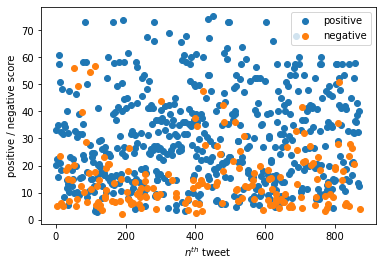

In [ ]:
plt.scatter(np.arange(1,len(df)+1,1),pos,label='positive')
plt.scatter(np.arange(1,len(df)+1,1),neg,label='negative')
plt.xlabel('$n^{th}$ tweet')
plt.ylabel('positive / negative score')
plt.legend(loc='best')
plt.show()

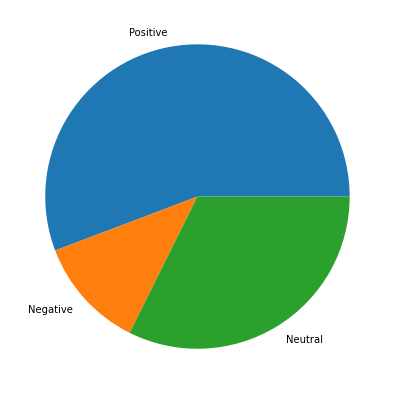

In [ ]:
sentiments = ['Positive', 'Negative', 'Neutral']
analysis = [len(positive),len(negative),len(neutral)]
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(analysis, labels = sentiments)
plt.show()